# Setup

In [350]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

In [351]:
base_exp_info = {
    'EXPERIMENT_NAME': 'conf_matrix_feat_exp_186',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
    ],
    
    # Expert demo parameters
    'DATASET': 'COMPAS',
    'TARGET_DATASET': 'Adult',
    'N_EXPERT_DEMOS': 5,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 20_000,
    'MIN_FREQ_FILL_PCT': .1,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#             'Dummy',
#         'DummyNoisy',
    ],
}

In [363]:
base_exp_info['N_TRIALS'] = 30
# base_exp_info['EPSILON'] = .06
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .03
base_exp_info['IGNORE_RESULTS_EPSILON'] = .07
base_exp_info['MAX_ITER'] = 7
base_exp_info['ALLOW_NEG_WEIGHTS'] = False
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS'] = False

In [364]:
experiments = [
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
    },
]

In [365]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [366]:
exp_info = dict(base_exp_info)

In [ ]:
source_X, source_y, source_feature_types = generate_dataset(
    exp_info['DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)
    
target_X, target_y, target_feature_types = generate_dataset(
    exp_info['TARGET_DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)

for f in source_feature_types['categoric']:
    source_X[f] = source_X[f].astype(str)
    
for f in target_feature_types['categoric']:
    target_X[f] = target_X[f].astype(str)

for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(
        exp_info,
        source_X=source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_186', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'EqOpp', 'FPRPar', 'TNRPar', 'FNRPar'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.1, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['OptAccNoisy'], 'N_TRIALS': 30, 'EPSILON': 0.03, 'IGNORE_RESULTS_EPSILON': 0.07, 'MAX_ITER': 7, 'ALLOW_NEG_WEIGHTS': False, 'DOT_WEIGHTS_FEAT_EXP': True, 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.63571429 0.72119468 0.76870562 0.76870562 0.72119468]
 [0.63714286 0.82099664 0.78682108 0.78682108 0.82099664]
 [0.62214286 0.77443673 0.80303752 0.80303752 0.77443673]
 [0.6297

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.636,0.721,0.769,0.769,0.721,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
1,0.637,0.821,0.787,0.787,0.821,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
2,0.622,0.774,0.803,0.803,0.774,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
3,0.630,0.848,0.823,0.823,0.848,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
4,0.635,0.814,0.765,0.765,0.814,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
5,0.624,0.776,0.805,0.805,0.776,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,0.0,0.000,inf,inf,0.0,0.0
6,0.430,0.934,0.684,0.684,0.934,0,0.430,0.418,0.418,0.934,0.936,0.936,0.684,0.673,0.673,0.684,0.673,0.673,0.934,0.936,0.936,0.418,0.807,0.936,0.0,1.0,-0.000,0.500,-0.0,-0.0,0.500,0.075,0.093,0.0,0.0
7,0.634,0.996,0.987,0.987,0.996,0,0.634,0.626,0.626,0.996,0.999,0.999,0.987,0.952,0.952,0.987,0.952,0.952,0.996,0.999,0.999,0.626,0.962,0.999,0.0,2.0,0.693,0.153,0.0,0.0,0.153,0.034,0.039,0.0,0.0
8,0.635,0.995,0.987,0.987,0.995,0,0.635,0.626,0.626,0.995,0.999,0.999,0.987,0.952,0.952,0.987,0.952,0.952,0.995,0.999,0.999,0.626,0.962,0.999,0.0,3.0,0.617,0.192,-0.0,-0.0,0.192,0.042,0.049,0.0,0.0
9,0.635,0.995,0.987,0.987,0.995,0,0.635,0.626,0.626,0.995,0.999,0.999,0.987,0.952,0.952,0.987,0.952,0.952,0.995,0.999,0.999,0.626,0.962,0.999,0.0,4.0,0.697,0.151,0.0,0.0,0.151,0.033,0.038,0.0,0.0


INFO:root:muE_target:
[[0.71949509 0.63804714 0.9114904  0.9114904  0.63804714]
 [0.73071529 0.63153595 0.96320346 0.96320346 0.63153595]
 [0.71949509 0.95165516 0.92614393 0.92614393 0.95165516]
 [0.75140449 0.9138756  0.97411003 0.97411003 0.9138756 ]
 [0.72752809 0.97906602 0.9722547  0.9722547  0.97906602]]
INFO:root:muE_perf_target:
[[0.71949509 0.78380777 0.5787037 ]
 [0.73352034 0.84920404 0.68110022]
 [0.70967742 0.84009274 0.78518695]
 [0.75421348 0.93939233 0.98086124]
 [0.72893258 0.93736472 0.86795491]]
INFO:root:target domain muL = [0.708 0.954 0.954 0.954 0.954]
INFO:root:target domain muE = [0.73  0.823 0.949 0.949 0.823]
INFO:root:target domain muL_hold = [0.701 0.932 0.984 0.984 0.932]
INFO:root:target domain muL_perf_hold = [0.701 0.948 0.932]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.615      0.87046351 0.91121018 0.91121018 0.87046351]
 [0.60428571 0.74566601 0.78817935 0.78817935 0.74566601]
 [0.62642857 0.7266985  0.80652263 0.80652263 0.7266985 ]
 [0.60972123 0.804

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.615,0.870,0.911,0.911,0.870,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.604,0.746,0.788,0.788,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.626,0.727,0.807,0.807,0.727,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.610,0.804,0.809,0.809,0.804,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.630,0.660,0.720,0.720,0.660,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.623,0.707,0.740,0.740,0.707,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.632,0.917,0.918,0.918,0.917,0,0.632,0.638,0.638,0.917,0.918,0.918,0.918,0.897,0.897,0.918,0.897,0.897,0.917,0.918,0.918,0.638,0.885,0.918,0.0,1.0,0.016,-0.000,0.492,0.492,-0.000,0.060,0.101,0.0,0.0
7,0.564,0.453,0.894,0.894,0.453,0,0.564,0.568,0.568,0.453,0.484,0.484,0.894,0.914,0.914,0.894,0.914,0.914,0.453,0.484,0.484,0.568,0.713,0.484,0.0,2.0,-0.000,-0.000,0.500,0.500,-0.000,0.048,0.103,0.0,0.0
8,0.634,0.878,0.881,0.881,0.878,0,0.632,0.637,0.638,0.917,0.877,0.918,0.918,0.873,0.897,0.918,0.873,0.897,0.917,0.877,0.918,0.638,0.885,0.918,0.0,3.0,0.975,0.012,-0.000,-0.000,0.012,0.015,0.008,0.0,0.0


INFO:root:muE_target:
[[0.74474053 0.92885375 0.93646894 0.93646894 0.92885375]
 [0.72650771 0.99799139 0.93687757 0.93687757 0.99799139]
 [0.73492286 0.87587413 0.99622819 0.99622819 0.87587413]
 [0.72752809 0.75992063 0.99059783 0.99059783 0.75992063]
 [0.70365169 0.61615408 0.90312928 0.90312928 0.61615408]]
INFO:root:muE_perf_target:
[[0.73211781 0.87365512 0.914361  ]
 [0.72230014 0.96031981 0.88436155]
 [0.73492286 0.93775209 0.87132867]
 [0.73174157 0.88160027 0.75992063]
 [0.69803371 0.82233313 0.62630636]]
INFO:root:target domain muL = [0.701 0.941 0.961 0.961 0.941]
INFO:root:target domain muE = [0.727 0.836 0.953 0.953 0.836]
INFO:root:target domain muL_hold = [0.699 1.    0.955 0.955 1.   ]
INFO:root:target domain muL_perf_hold = [0.699 0.992 1.   ]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.63785714 0.65318914 0.69760332 0.69760332 0.65318914]
 [0.64       0.61068376 0.68895611 0.68895611 0.61068376]
 [0.61071429 0.6561625  0.71302238 0.71302238 0.6561625 ]
 [0.63759828 0.724

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.638,0.653,0.698,0.698,0.653,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.640,0.611,0.689,0.689,0.611,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.611,0.656,0.713,0.713,0.656,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.638,0.725,0.726,0.726,0.725,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.630,0.596,0.657,0.657,0.596,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.630,0.790,0.807,0.807,0.790,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.528,0.002,0.001,0.001,0.002,0,0.528,0.527,0.527,0.002,0.001,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.001,0.527,0.001,0.001,0.0,1.0,0.024,-0.219,-0.269,-0.269,-0.219,0.211,0.246,0.0,0.0
7,0.638,0.863,0.874,0.874,0.863,0,0.638,0.626,0.626,0.863,0.920,0.920,0.874,0.883,0.883,0.874,0.883,0.883,0.863,0.920,0.920,0.626,0.885,0.920,0.0,2.0,0.571,0.000,0.214,0.214,0.000,0.042,0.018,0.0,0.0
8,0.637,0.865,0.874,0.874,0.865,0,0.637,0.626,0.626,0.865,0.920,0.920,0.874,0.883,0.883,0.874,0.883,0.883,0.865,0.920,0.920,0.626,0.885,0.920,0.0,3.0,0.624,-0.000,0.188,0.188,-0.000,0.036,0.016,0.0,0.0
9,0.637,0.865,0.874,0.874,0.865,0,0.637,0.626,0.626,0.865,0.920,0.920,0.874,0.883,0.883,0.874,0.883,0.883,0.865,0.920,0.920,0.626,0.885,0.920,0.0,4.0,0.732,-0.000,0.134,0.134,-0.000,0.026,0.012,0.0,0.0


INFO:root:muE_target:
[[0.72931276 0.86012461 0.94778122 0.94778122 0.86012461]
 [0.75736325 0.90847532 0.99378399 0.99378399 0.90847532]
 [0.71248247 0.97017544 0.98708746 0.98708746 0.97017544]
 [0.73455056 0.94553914 0.91104269 0.91104269 0.94553914]
 [0.74157303 0.95670996 0.94011422 0.94011422 0.95670996]]
INFO:root:muE_perf_target:
[[0.73352034 0.83182708 0.694081  ]
 [0.75175316 0.92838812 0.92682394]
 [0.70967742 0.93236715 0.89017544]
 [0.73455056 0.87181225 0.8456486 ]
 [0.74157303 0.92068547 0.95670996]]
INFO:root:target domain muL = [0.708 0.914 0.978 0.978 0.914]
INFO:root:target domain muE = [0.735 0.928 0.956 0.956 0.928]
INFO:root:target domain muL_hold = [0.689 0.936 0.998 0.998 0.936]
INFO:root:target domain muL_perf_hold = [0.689 0.96  0.936]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.63285714 0.77452675 0.84698912 0.84698912 0.77452675]
 [0.62214286 0.68181818 0.73153142 0.73153142 0.68181818]
 [0.62357143 0.734544   0.80699588 0.80699588 0.734544  ]
 [0.61258041 0.812

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.633,0.775,0.847,0.847,0.775,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.622,0.682,0.732,0.732,0.682,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.624,0.735,0.807,0.807,0.735,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.613,0.812,0.758,0.758,0.812,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.657,0.832,0.773,0.773,0.832,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.617,0.626,0.705,0.705,0.626,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.637,0.988,0.981,0.981,0.988,0,0.637,0.64,0.64,0.988,0.977,0.977,0.981,0.957,0.957,0.981,0.957,0.957,0.988,0.977,0.977,0.64,0.964,0.977,0.0,1.0,0.031,0.328,0.157,0.157,0.328,0.082,0.094,0.0,0.0
7,0.638,0.988,0.981,0.981,0.988,0,0.638,0.64,0.64,0.988,0.979,0.979,0.981,0.955,0.955,0.981,0.955,0.955,0.988,0.979,0.979,0.64,0.962,0.979,0.0,2.0,0.653,0.173,-0.000,-0.000,0.173,0.042,0.048,0.0,0.0
8,0.637,0.988,0.981,0.981,0.988,0,0.638,0.64,0.64,0.988,0.977,0.979,0.981,0.957,0.955,0.981,0.957,0.955,0.988,0.977,0.979,0.64,0.962,0.979,0.0,3.0,0.915,0.043,0.000,0.000,0.043,0.010,0.012,0.0,0.0


INFO:root:muE_target:
[[0.70827489 0.99350649 0.93719807 0.93719807 0.99350649]
 [0.72089762 0.92169059 0.99505495 0.99505495 0.92169059]
 [0.71107994 0.79536253 0.9970542  0.9970542  0.79536253]
 [0.69522472 0.74894176 0.94835165 0.94835165 0.74894176]
 [0.71769663 0.9900161  0.9480743  0.9480743  0.9900161 ]]
INFO:root:muE_perf_target:
[[0.71248247 0.93812759 0.92207792]
 [0.71669004 0.9651173  0.92169059]
 [0.71107994 0.88522512 0.76168568]
 [0.68539326 0.90760156 0.78061597]
 [0.71067416 0.98490196 0.99033816]]
INFO:root:target domain muL = [0.698 0.989 0.998 0.998 0.989]
INFO:root:target domain muE = [0.711 0.89  0.965 0.965 0.89 ]
INFO:root:target domain muL_hold = [0.701 0.935 0.984 0.984 0.935]
INFO:root:target domain muL_perf_hold = [0.701 0.997 0.935]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.66142857 0.7447551  0.72951498 0.72951498 0.7447551 ]
 [0.62071429 0.72332697 0.70103044 0.70103044 0.72332697]
 [0.63214286 0.7042281  0.76770517 0.76770517 0.7042281 ]
 [0.63116512 0.744

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.661,0.745,0.730,0.730,0.745,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.621,0.723,0.701,0.701,0.723,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.632,0.704,0.768,0.768,0.704,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.631,0.745,0.822,0.822,0.745,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.649,0.763,0.765,0.765,0.763,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.634,0.803,0.710,0.710,0.803,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.566,0.416,0.897,0.897,0.416,0,0.566,0.566,0.566,0.416,0.443,0.443,0.897,0.846,0.846,0.897,0.846,0.846,0.416,0.443,0.443,0.566,0.649,0.443,0.0,1.0,0.079,-0.295,0.166,0.166,-0.295,0.112,0.103,0.0,0.0
7,0.645,0.875,0.882,0.882,0.875,0,0.645,0.629,0.629,0.875,0.866,0.866,0.882,0.909,0.909,0.882,0.909,0.909,0.875,0.866,0.866,0.629,0.873,0.866,0.0,2.0,0.914,-0.000,0.043,0.043,0.000,0.006,0.012,0.0,0.0


INFO:root:muE_target:
[[0.74614306 0.81145683 0.97468672 0.97468672 0.81145683]
 [0.73352034 0.90582315 0.90352117 0.90352117 0.90582315]
 [0.73492286 0.965      0.92259602 0.92259602 0.965     ]
 [0.72331461 0.86283808 0.98142888 0.98142888 0.86283808]
 [0.74438202 0.97338247 0.9090586  0.9090586  0.97338247]]
INFO:root:muE_perf_target:
[[0.75175316 0.87854528 0.79723882]
 [0.73211781 0.88306704 0.90582315]
 [0.72230014 0.97437476 0.915     ]
 [0.72050562 0.94233558 0.90129961]
 [0.74578652 0.85678904 0.96887797]]
INFO:root:target domain muL = [0.707 0.973 0.999 0.999 0.973]
INFO:root:target domain muE = [0.736 0.904 0.938 0.938 0.904]
INFO:root:target domain muL_hold = [0.695 0.972 0.993 0.993 0.972]
INFO:root:target domain muL_perf_hold = [0.695 0.97  0.972]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.62785714 0.7955026  0.80290766 0.80290766 0.7955026 ]
 [0.61357143 0.69632035 0.72055761 0.72055761 0.69632035]
 [0.63142857 0.77665846 0.76916632 0.76916632 0.77665846]
 [0.62973553 0.779

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.628,0.796,0.803,0.803,0.796,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.614,0.696,0.721,0.721,0.696,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.631,0.777,0.769,0.769,0.777,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.630,0.780,0.714,0.714,0.780,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.627,0.819,0.854,0.854,0.819,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.624,0.610,0.707,0.707,0.610,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.458,0.952,0.901,0.901,0.952,0,0.458,0.469,0.469,0.952,0.958,0.958,0.901,0.888,0.888,0.901,0.888,0.888,0.952,0.958,0.958,0.469,0.925,0.958,0.0,1.0,0.000,0.413,0.087,0.087,0.413,0.080,0.114,0.0,0.0
7,0.636,0.998,0.974,0.974,0.998,0,0.636,0.631,0.631,0.998,0.993,0.993,0.974,0.969,0.969,0.974,0.969,0.969,0.998,0.993,0.993,0.631,0.954,0.993,0.0,2.0,0.469,0.266,-0.000,-0.000,0.266,0.065,0.081,0.0,0.0
8,0.638,0.959,0.938,0.938,0.959,0,0.458,0.633,0.469,0.952,0.956,0.958,0.901,0.937,0.888,0.901,0.937,0.888,0.952,0.956,0.958,0.469,0.925,0.958,0.0,3.0,0.134,0.000,0.433,0.433,0.000,0.061,0.060,0.0,0.0
9,0.635,0.997,0.974,0.974,0.997,0,0.458,0.631,0.469,0.952,0.994,0.958,0.901,0.971,0.888,0.901,0.971,0.888,0.952,0.994,0.958,0.469,0.925,0.958,0.0,4.0,0.323,0.339,0.000,0.000,0.339,0.068,0.092,0.0,0.0


INFO:root:muE_target:
[[0.72791024 0.68465184 0.99475595 0.99475595 0.68465184]
 [0.75596073 0.93967587 0.98520249 0.98520249 0.93967587]
 [0.71528752 0.94080997 0.97804835 0.97804835 0.94080997]
 [0.70505618 0.67131713 0.92089732 0.92089732 0.67131713]
 [0.73735955 0.72441809 0.93450028 0.93450028 0.72441809]]
INFO:root:muE_perf_target:
[[0.72230014 0.92203915 0.72311338]
 [0.75596073 0.93451095 0.93457383]
 [0.71809257 0.95522433 0.93613707]
 [0.71067416 0.85372673 0.70657066]
 [0.73314607 0.86633987 0.7294686 ]]
INFO:root:target domain muL = [0.716 0.965 0.998 0.998 0.965]
INFO:root:target domain muE = [0.728 0.792 0.963 0.963 0.792]
INFO:root:target domain muL_hold = [0.7   0.907 0.962 0.962 0.907]
INFO:root:target domain muL_perf_hold = [0.7   0.92  0.907]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.62642857 0.78416689 0.78134805 0.78134805 0.78416689]
 [0.63857143 0.80877542 0.8360748  0.8360748  0.80877542]
 [0.615      0.81769072 0.91561859 0.91561859 0.81769072]
 [0.6340243  0.769

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.626,0.784,0.781,0.781,0.784,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.639,0.809,0.836,0.836,0.809,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.615,0.818,0.916,0.916,0.818,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.634,0.770,0.731,0.731,0.770,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.627,0.749,0.763,0.763,0.749,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.623,0.726,0.750,0.750,0.726,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.631,0.997,0.978,0.978,0.997,0,0.631,0.625,0.625,0.997,0.99,0.99,0.978,0.939,0.939,0.978,0.939,0.939,0.997,0.99,0.99,0.625,0.957,0.99,0.0,1.0,0.052,0.300,0.174,0.174,0.300,0.073,0.085,0.0,0.0
7,0.631,0.997,0.978,0.978,0.997,0,0.631,0.625,0.625,0.997,0.99,0.99,0.978,0.939,0.939,0.978,0.939,0.939,0.997,0.99,0.99,0.625,0.957,0.99,0.0,2.0,0.888,0.056,0.000,0.000,0.056,0.013,0.015,0.0,0.0


INFO:root:muE_target:
[[0.70687237 0.96850121 0.94816587 0.94816587 0.96850121]
 [0.73632539 0.7546721  0.9462159  0.9462159  0.7546721 ]
 [0.73632539 0.96700508 0.89246032 0.89246032 0.96700508]
 [0.70646067 0.99628313 0.98037801 0.98037801 0.99628313]
 [0.71067416 0.82879227 0.96645522 0.96645522 0.82879227]]
INFO:root:muE_perf_target:
[[0.71669004 0.89821741 0.95448252]
 [0.73772791 0.93292452 0.75008495]
 [0.73211781 0.8912581  0.96700508]
 [0.70224719 0.92709678 0.88752424]
 [0.71207865 0.9450871  0.95478261]]
INFO:root:target domain muL = [0.7   0.994 1.    1.    0.994]
INFO:root:target domain muE = [0.719 0.903 0.947 0.947 0.903]
INFO:root:target domain muL_hold = [0.702 0.967 0.998 0.998 0.967]
INFO:root:target domain muL_perf_hold = [0.702 0.978 0.967]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.62285714 0.73584636 0.79429085 0.79429085 0.73584636]
 [0.605      0.70113493 0.68253875 0.68253875 0.70113493]
 [0.63571429 0.69125095 0.73033708 0.73033708 0.69125095]
 [0.61401001 0.746

,Acc,EqOpp,FPRPar,TNRPar,FNRPar,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_FPRPar,muL_hold_FPRPar,muL_best_hold_FPRPar,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_FNRPar,muL_hold_FNRPar,muL_best_hold_FNRPar,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,EqOpp_weight,FPRPar_weight,TNRPar_weight,FNRPar_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.646,0.806,0.772,0.772,0.806,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.596,0.714,0.708,0.708,0.714,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.626,0.632,0.694,0.694,0.632,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.606,0.770,0.832,0.832,0.770,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.624,0.711,0.692,0.692,0.711,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.629,0.855,0.857,0.857,0.855,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.475,0.000,0.003,0.003,0.000,0,0.475,0.461,0.461,0.00,0.002,0.002,0.003,0.011,0.011,0.003,0.011,0.011,0.00,0.002,0.002,0.461,0.007,0.002,0.0,1.0,-0.034,-0.292,-0.191,-0.191,-0.292,0.241,0.223,0.0,0.0
7,0.634,0.920,0.895,0.895,0.920,0,0.634,0.641,0.641,0.92,0.896,0.896,0.895,0.909,0.909,0.895,0.909,0.909,0.92,0.896,0.896,0.641,0.873,0.896,0.0,2.0,0.560,0.000,0.220,0.220,0.000,0.037,0.044,0.0,0.0
8,0.634,0.920,0.895,0.895,0.920,0,0.634,0.641,0.641,0.92,0.896,0.896,0.895,0.909,0.909,0.895,0.909,0.909,0.92,0.896,0.896,0.641,0.873,0.896,0.0,3.0,0.826,-0.000,0.087,0.087,-0.000,0.015,0.017,0.0,0.0


INFO:root:muE_target:
[[0.72370266 0.81609195 0.95190492 0.95190492 0.81609195]
 [0.74333801 0.95380435 0.93985332 0.93985332 0.95380435]
 [0.73492286 0.86928934 0.97133265 0.97133265 0.86928934]
 [0.73455056 0.98045822 0.98928829 0.98928829 0.98045822]
 [0.74016854 0.79234559 0.93523267 0.93523267 0.79234559]]
INFO:root:muE_perf_target:
[[0.72370266 0.90866973 0.80131363]
 [0.73913043 0.95289855 0.84280936]
 [0.73772791 0.92286136 0.87944162]
 [0.73595506 0.95080294 0.93530997]
 [0.74297753 0.85463057 0.77756726]]
INFO:root:target domain muL = [0.71  0.933 0.979 0.979 0.933]
INFO:root:target domain muE = [0.735 0.882 0.958 0.958 0.882]
INFO:root:target domain muL_hold = [0.7   0.994 0.999 0.999 0.994]
INFO:root:target domain muL_perf_hold = [0.7   0.971 0.994]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.62357143 0.75328269 0.75484052 0.75484052 0.75328269]
 [0.63071429 0.6437247  0.72634953 0.72634953 0.6437247 ]
 [0.64214286 0.73389232 0.77291014 0.77291014 0.73389232]
 [0.63259471 0.723

# Compare results with source domain only

In [359]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [360]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission
min_exp_timestamp = '2023-10-10 12:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

DATASET: COMPAS


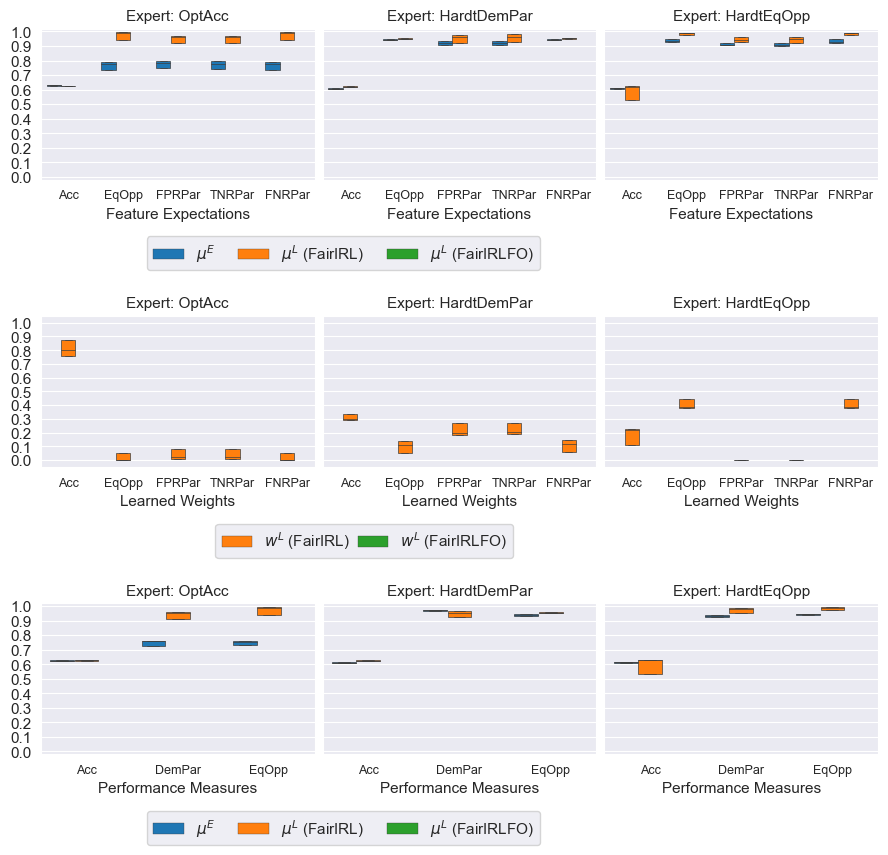

In [361]:
plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=[
        'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
    ],
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    perf_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
#     min_mu_value=.25,
#     max_mu_value=1,
#     min_w_value=-1,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    perf_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(-.02, 1.02),
    perf_ylim=(-.02, 1.02),
    mu_whis=[1, 99],
    w_yticks = np.linspace(0, 1, 11).round(2),
    w_ylim=(-.05, 1.05),
    w_whis=[5, 95]
)

# Compare results with target domain

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


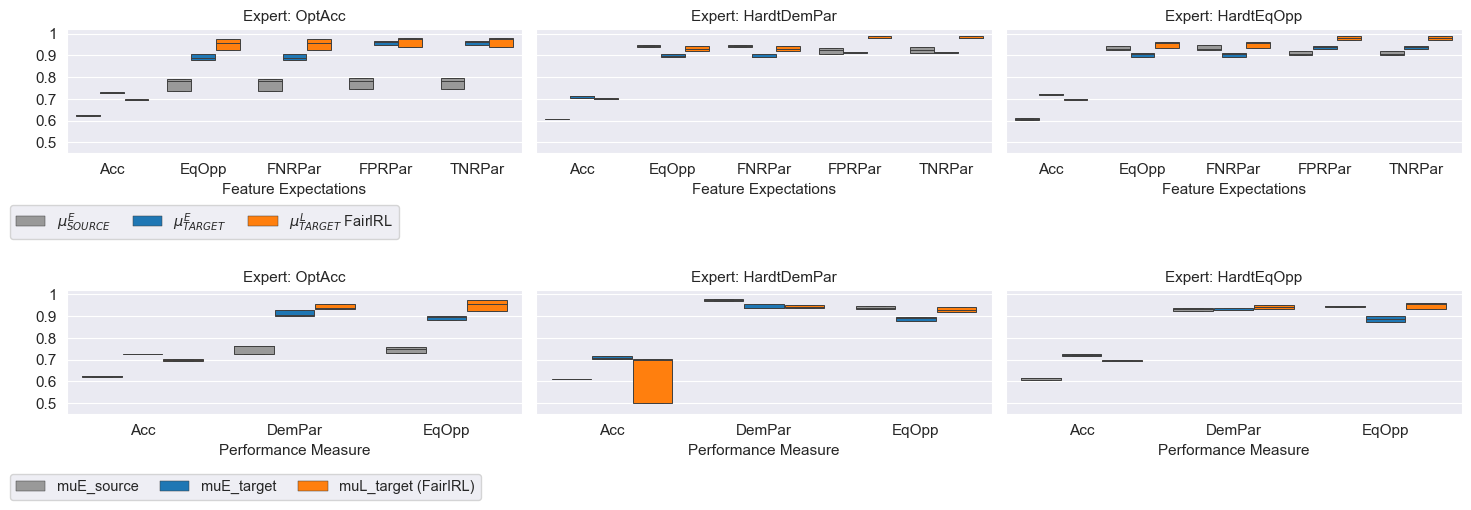

In [362]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=10.5)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

result, mu_df, w_df, perf_df = plot_results_target_domain(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    source_dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.001,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=.5,
#     mu_yticks=[.6, .7, .8, .9, 1],
    mu_yticks=[.4, .5, .6, .7, .8, .9, 1],
    mu_ylim=(.45, 1.02),
    mu_whis=[5, 95],
    perf_noise_factor=.01,
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_yticks=np.linspace(0, 1, 11).round(1),
    perf_ylim=(-.02, 1.02),
)

# Scratch

In [170]:
exp_info = dict(base_exp_info)
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
    'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
    'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
#     'EqOpp',
#     'PredPar',
]
exp_info['RESTRICT_Y_ACTION'] = True

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
del X, y


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

# wi = [.2, .3, -.15, -.2]  # .598, .881, .906
# wi = [.195, .22, -.205, -.17]  # .608, .984, .994
wi = [.2, .3, .15, .2]  # .598, .881, .906
# wi = [.9, .02, .02]


reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

test_df = X_test.copy()
test_df['y'] = y_test
# test_df = X_train.copy()
# test_df['y'] = y_train
# test_df['y'] = clf.predict(X_test)

clf_pol = compute_optimal_policy(
    clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


print('Acc', AccuracyObjective().compute_feat_exp(demo).round(3))
print('DemPar', DemographicParityObjective().compute_feat_exp(demo).round(3))
print('EqOpp', EqualOpportunityObjective().compute_feat_exp(demo).round(3))

display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))

		 muL = [0.748 0.776 0.503 0.396]
Acc 0.605
DemPar 0.947
EqOpp 0.972


yhat                  
    count      mean     sum
z y                        
0 0  4608  0.496745  2289.0
  1  4768  0.748112  3567.0
1 0  2650  0.604151  1601.0
  1  1970  0.776142  1529.0

yhat                  
  count      mean     sum
z                        
0  9376  0.624573  5856.0
1  4620  0.677489  3130.0